In [19]:
import pandas as pd
import json 
import requests

In [20]:
Invoices = "https://drive.google.com/uc?export=download&id=1_JUP1EYc4r1jgNpeLh7mMQxsKOsT-pcs"

Customers = "https://drive.google.com/uc?export=download&id=1n6ePaU-cPfzhBKnSeGeynAxR9IYmCS0w"

In [21]:
df_invoices = pd.read_csv(Invoices)
response = requests.get(Customers)
customer_dictionary = json.loads(response.text)




In [22]:
#Easy(1) 
response = requests.get(Customers)
customer_dictionary = json.loads(response.text)

customers_dataframe = pd.DataFrame(customer_dictionary)  
customers_dataframe["full_name"] = customers_dataframe['first_name'] + ' ' + customers_dataframe['last_name']  # Concatenate strings, not dictionaries

print(customers["full_name"].nunique())

4992


In [23]:
#Easy(2)
unique_category_list = df_invoices['category'].unique()

print(unique_category_list)
print(len(unique_category_list))


['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


In [24]:
#Easy 3 
payment_counter = df_invoices['payment_method'].value_counts()
most_common = payment_counter.head(1)
print(most_common)

payment_method
Cash    44447
Name: count, dtype: int64


In [25]:
#Medium (1)
df_invoices['sales'] = df_invoices['quantity'] * df_invoices['price']
sales_by_category = df_invoices.groupby('category')['sales'].sum()
descending_sales = sales_by_category.sort_values(ascending=False)
most_sales = descending_sales.head(3)
print(most_sales)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64


In [26]:
#Medium (2)
number_of_ages = len(customer_dictionary['age'])
age_list = customer_dictionary['age']
keys_over_45 = []
for i in range(number_of_ages):
   key = str(i)
   if key in age_list and age_list[key] != None:
        age = int(age_list[key])
        if age > 45:
            keys_over_45.append(key)

oldies_series = pd.Series(keys_over_45)

col_slice_1 = ['price', 'customer_id', 'quantity']
row_slice_1 = [int(key) for key in keys_over_45]
filtered_quantity_price = df_invoices.iloc[row_slice_1, [df_invoices.columns.get_loc(col) for col in col_slice_1]]

over_45_sales = filtered_quantity_price['price'] *filtered_quantity_price['quantity']
print(over_45_sales.sum())

4445825.569999999


['Winter', 'Spring', 'Summer', 'Autumn']
[29770, 23914, 23093, 22680]


<function matplotlib.pyplot.show(close=None, block=None)>

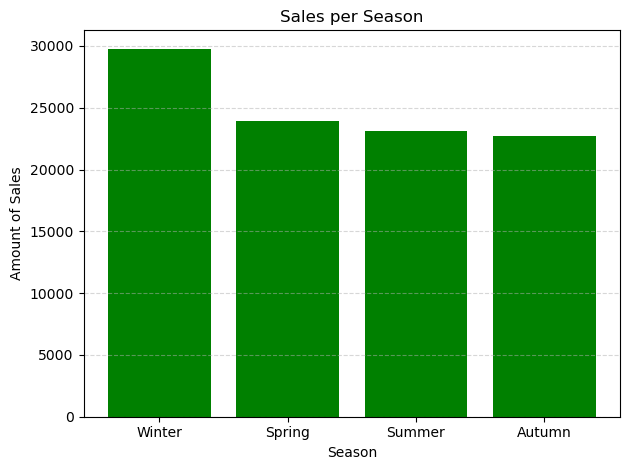

In [27]:
#Medium (3)
import matplotlib.pyplot as plt
import pandas as pd 

date_series = df_invoices['invoice_date']
converted_dates = pd.to_datetime(date_series, dayfirst=True)

def season(converted_dates):
    
    month = converted_dates.month
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]: 
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    else:
        return "Autumn"

season_counter = converted_dates.map(season)
total_count = season_counter.value_counts() 


seasons_list = total_count.index.tolist()
quantity_per_season = total_count.values.tolist()
print(seasons_list)
print(quantity_per_season)
plt.bar(seasons_list,quantity_per_season, color = 'green')

plt.xlabel('Season')
plt.ylabel('Amount of Sales')
plt.title('Sales per Season')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show


In [28]:
#Hard(1)
number_of_ages = len(customer_dictionary['age'])
age_list = customer_dictionary['age']
valid_keys = []
for x in range(number_of_ages):
   id_key = str(x)
   if id_key in age_list and age_list[id_key] != None:
        age = int(age_list[id_key])  
        valid_keys.append(id_key)  

valid_age_series = [age_list[key] for key in valid_keys]
df = pd.DataFrame({'valid_age_group': valid_age_series})

df['age_group'] = (df['valid_age_group'] // 10 * 10 ).astype(str) + '-' + (df['valid_age_group']//10 *10 +9).astype(str)
df['category'] = df_invoices['category']
df['sales'] = df_invoices['quantity'] * df_invoices['price']

col_slice_2 = ['price', 'customer_id', 'quantity']
row_slice_2 = [int(key) for key in valid_keys]
valid_quantity_price = df_invoices.iloc[row_slice_2, [df_invoices.columns.get_loc(col) for col in col_slice_2]]
valid_sales = valid_quantity_price['price'] * valid_quantity_price ['quantity']

pivot=df.groupby(['category','age_group'])['sales'].sum().unstack(fill_value=0)
print(pivot)

age_group        10.0-19.0  20.0-29.0  30.0-39.0  40.0-49.0  50.0-59.0  \
category                                                                 
Books                15.15    3999.60    3742.05    3590.55    3696.60   
Clothing          94225.12  499633.20  477127.20  609162.40  502934.08   
Cosmetics         12685.92   27323.52   39155.58   39521.52   31389.52   
Food & Beverage     894.33    3922.50    5083.56    4492.57    4597.17   
Shoes             66018.70  297084.15  507743.82  316889.76  304286.19   
Souvenir            304.98    4128.96    4257.99    3612.84    4269.72   
Technology        87150.00  305550.00  344400.00  340200.00  330750.00   
Toys               2293.76   19640.32   14658.56   14837.76   17059.84   

age_group        60.0-69.0  70.0-79.0  80.0-89.0  
category                                          
Books              5196.45    2227.05    2848.20  
Clothing         541944.48  391604.40  230761.52  
Cosmetics         29966.42   25249.86   14840.90  
Food